In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import TensorDataset
from prep_dataset import *
from train import get_logs

In [40]:
def config_filter(dic, param_names, param_values):
    for i, name in enumerate(param_names):
        if not(dic[name] == param_values[i]):
            return False
    return True

In [41]:
ds_name = "ENZYMES"
dataset, info = prep_dataset(ds_name)
n_features = info[0]
n_classes = info[1]

In [42]:
path = './logs'
test_logs, train_logs = get_logs(path)

In [43]:
configs = []
test_results = []
param_names = ['learning_rate', 'n_epochs', 'hidden_dim', 'dropout']
# Getting list of configs
test_logs = list(filter(lambda x: x["dataset"] == "ENZYMES", test_logs))
config_dicts = list(filter(lambda x: "GCNA" in x["model_name"], test_logs))
for dic in config_dicts:
    configs.append([dic.get(key) for key in param_names])

# Getting test results for each config
for config in configs:
    temp = []
    results = list(filter(lambda x: config_filter(x, param_names, config), test_logs))
    for res in results:
        temp.append([res["model_name"], res["Avg"], res["std"], res["max"]]) 
    test_results.append(temp)

for r in test_results:
    print(np.array(r))
    print()


[['GCNA' '22.7' '6.181423784210237' '35.0']
 ['GCN' '20.9' '4.867237409455184' '31.0']
 ['GINA' '30.0' '5.079370039680118' '40.0']
 ['GIN' '27.4' '5.238320341483518' '35.0']]

[['GCNA' '24.4' '5.141984052872976' '35.0']
 ['GCN' '18.1' '6.040695324215582' '30.0']
 ['GINA' '44.6' '8.452218643646177' '55.0']
 ['GIN' '31.3' '8.46226919921601' '41.0']]

[['GCNA' '31.1' '5.008991914547277' '38.0']
 ['GCN' '28.7' '2.758622844826744' '35.0']
 ['GINA' '60.8' '6.925315877272314' '71.0']
 ['GIN' '45.9' '5.448853090330111' '53.0']]



In [47]:
# Getting train logs for each config
training_logs = []
for config in configs:
    print(config)
    temp = []
    results = list(filter(lambda x: config_filter(x["info_dict"], param_names, config), train_logs))
    training_logs.append([res["log"] for res in results])

['0.0005', '100', '20', '0.01']
['0.001', '300', '20', '0.1']
['0.001', '300', '64', '0.1']


In [45]:
def plot_learning_curves(train_log):
    fig, ax = plt.subplots(1, 2, figsize=(20, 4))
    #fig.tight_layout()
    ax[0].grid()
    ax[1].grid()

    ax[0].plot(train_log[:, 0], train_log[:, 1])
    ax[0].set(xlabel="epochs", ylabel="loss")

    ax[1].set_ylim(bottom=0, top=100)
    ax[1].plot(train_log[:, 0], train_log[:, 2])
    ax[1].set(xlabel="epochs", ylabel="train_acc")
    #ax[1].legend()

    return fig, ax

def plot_training_acc(logs, n_folds):
    model_names = ['GCNA', 'GCN', 'GINA', 'GIN']
    for i in range(n_folds):
        fig = plt.figure(figsize=(15,5))
        fig.suptitle("Training Acc split no. {}".format(i+1))
        ax = plt.axes()
        ax.grid()
        ax.set(xlabel="epochs", ylabel="train_acc")
        ax.set_ylim(bottom=0, top=100)
        for log in logs:
            ax.plot(log[i, :, 0], log[i, :, 2])
            ax.legend(model_names)

## Class distribution of the dataset (ENZYMES):

Percentage of class 1: 16.67%
Percentage of class 2: 16.67%
Percentage of class 3: 16.67%
Percentage of class 4: 16.67%
Percentage of class 5: 16.67%
Percentage of class 6: 16.67%


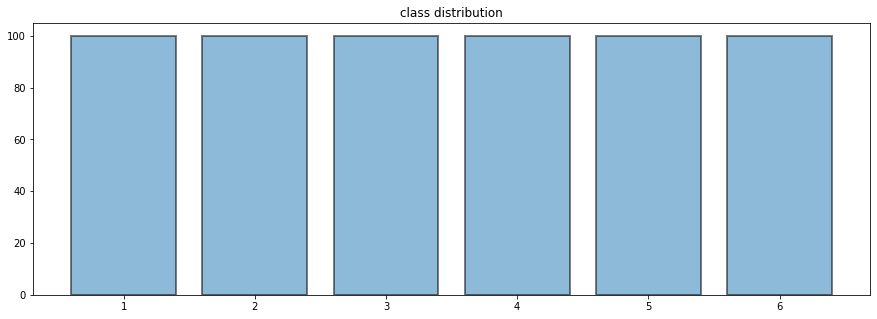

In [46]:
h_labels = dataset[:][2]
unique, counts = np.unique(h_labels.cpu(), return_counts=True)
###
for i, cl in enumerate(unique):
    print("Percentage of class {}: {:.2f}%".format(cl, 100*counts[i]/sum(counts)))
####
fig = plt.figure(figsize=(15,5))
ax = plt.axes()
ax.bar(unique, counts, align='center', alpha=0.5, edgecolor='black', linewidth=2)
ax.set_title("class distribution")
ax.set_xticks(unique)
plt.show()

## Resluts:

### First set of hyperparameters:

- learning rate = 0.0005
- number of epochs = 100
- hidden layers' dimension = 20
- dropout rate = 0.01
- number of gnn layers (GIN) = 5
- number of mlp layers (GIN) = 2

| Model | Avg. Accuracy |std| Max Accuracy |
|:-----:|:-------------:|:--:|:------------:|
|  GCN  |     20.9%     |4.89|     31.0%    |
|  GCNA |     22.7%     |6.18|     35.0%    |
|  GIN  |     27.4%     |5.24|     35.0%    |
|  GINA |     30.0%     |5.08|     40.0%    |


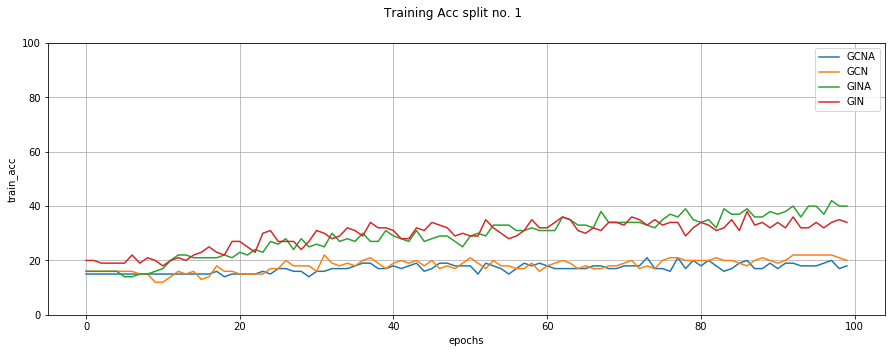

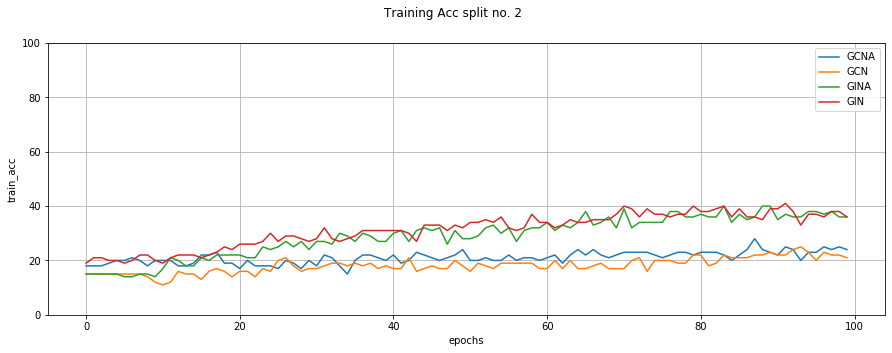

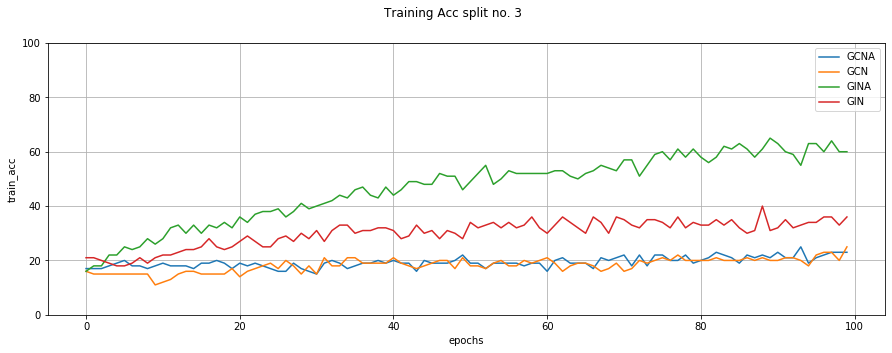

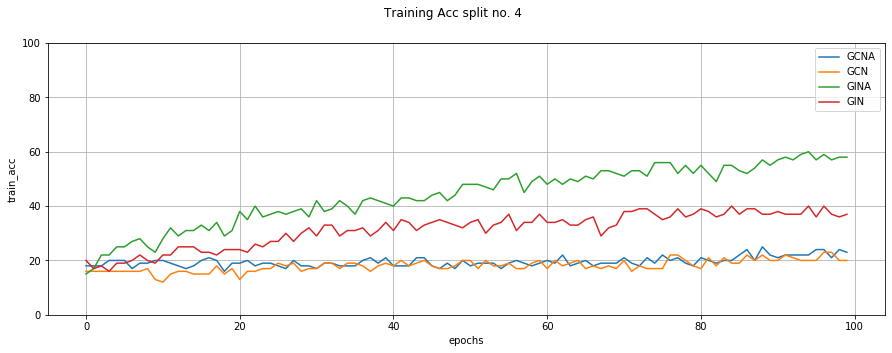

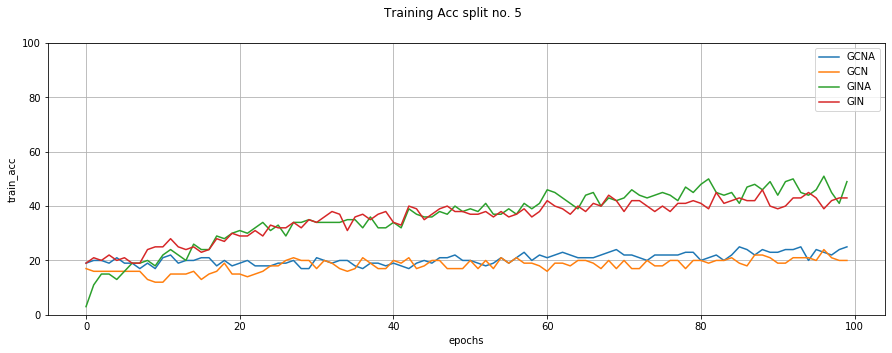

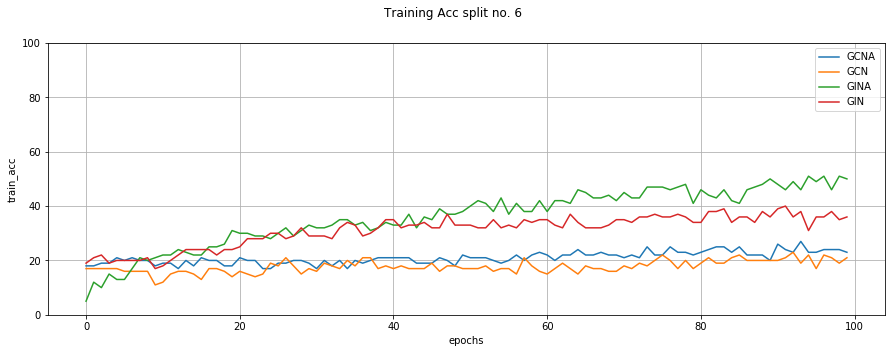

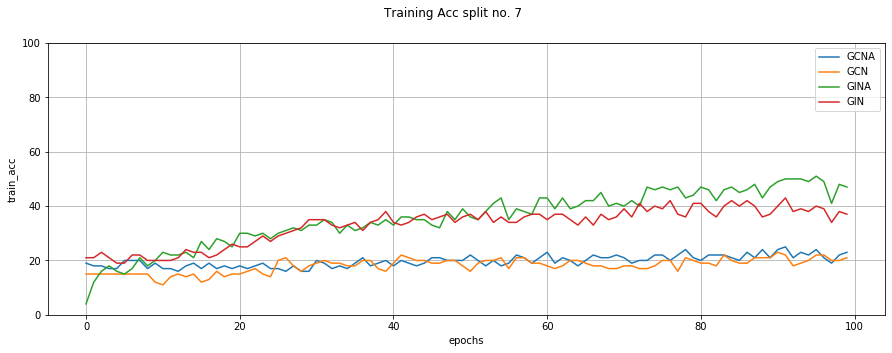

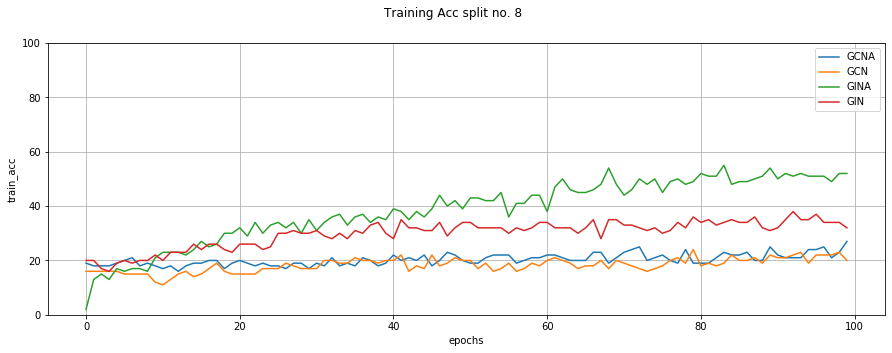

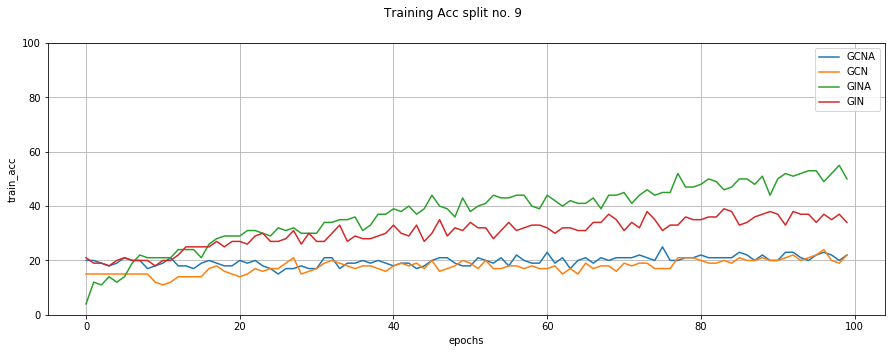

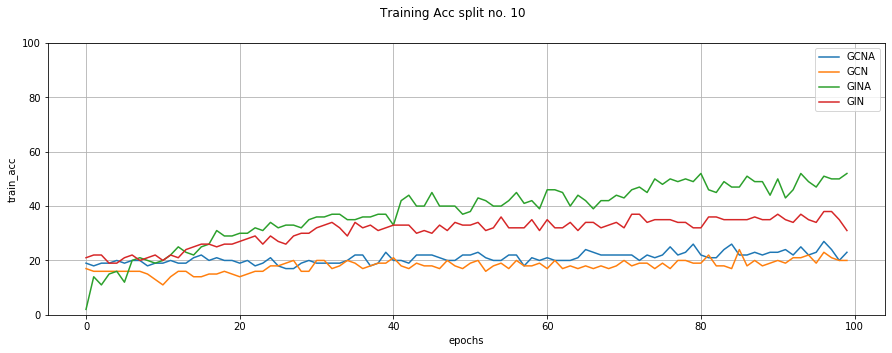

In [48]:
plot_training_acc(training_logs[0], 10)

### Second set of hyperparameters:

- learning rate = 0.001
- number of epochs = 300
- hidden layers' dimension = 20
- dropout rate = 0.1
- number of gnn layers (GIN) = 5
- number of mlp layers (GIN) = 2

| Model | Avg. Accuracy |std| Max Accuracy |
|:-----:|:-------------:|:--:|:------------:|
|  GCN  |     18.1%     |6.04|     30.0%    |
|  GCNA |     27.0%     |5.14|     35.0%    |
|  GIN  |     31.1%     |8.46|     41.0%    |
|  GINA |     44.6%     |8.45|     55.0%    |

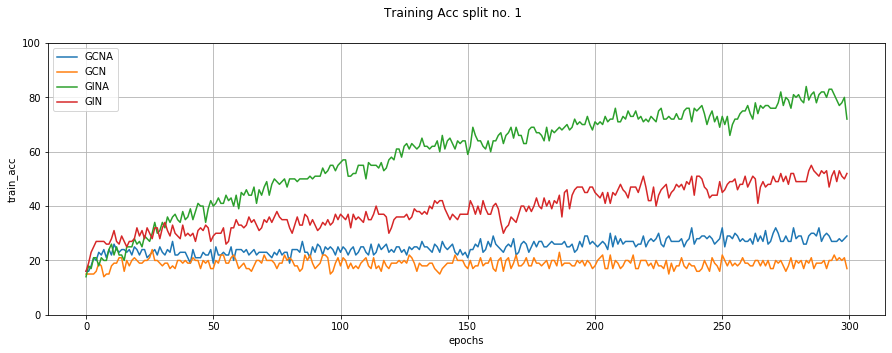

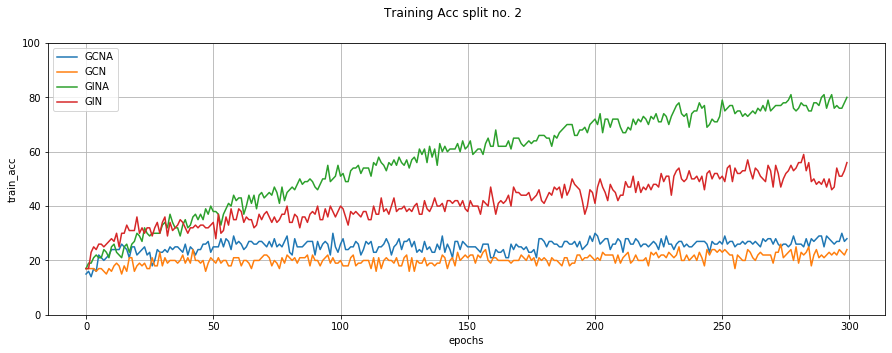

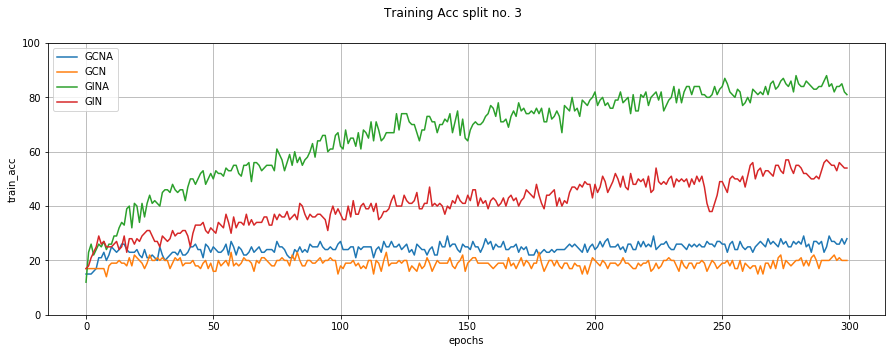

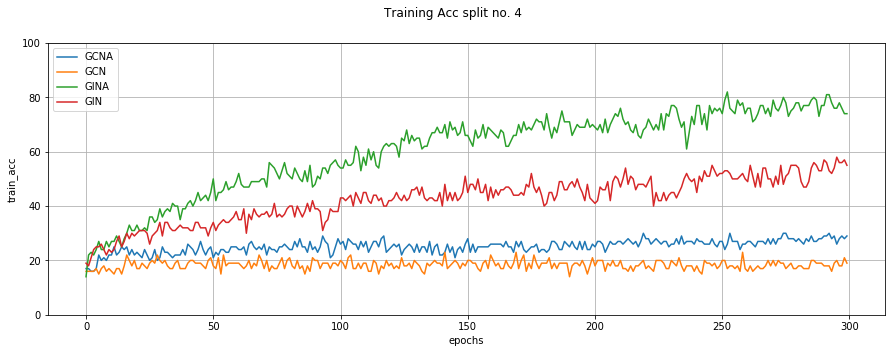

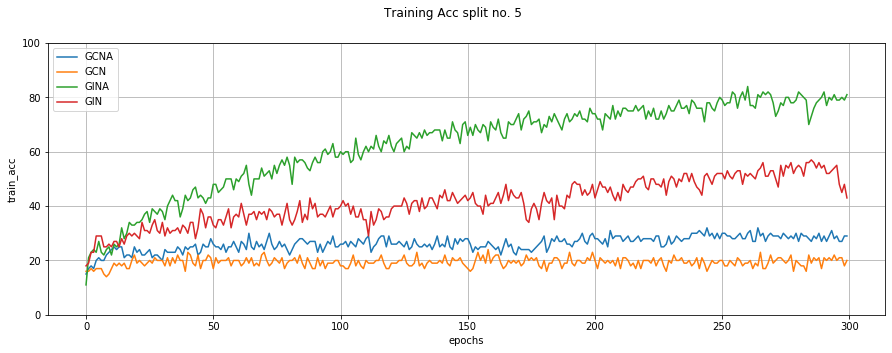

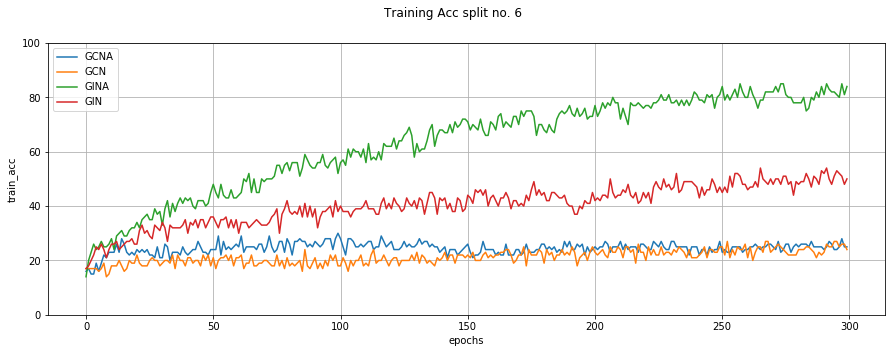

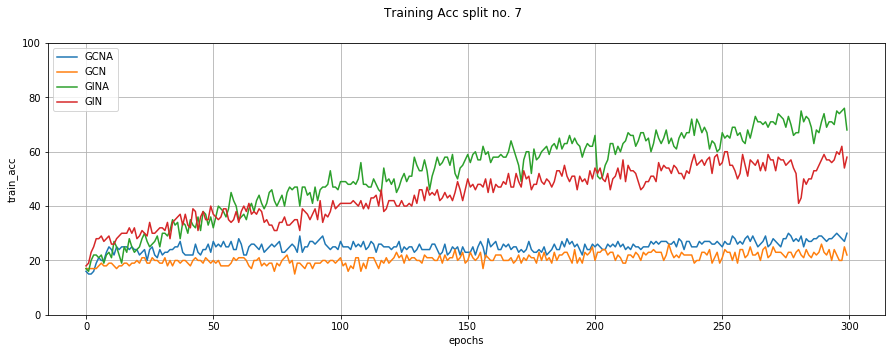

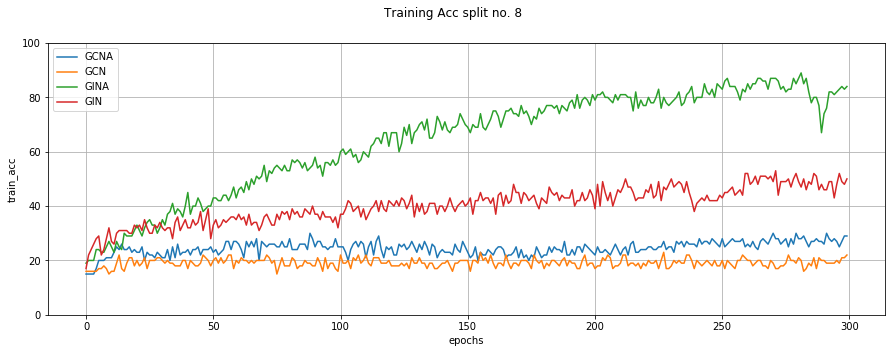

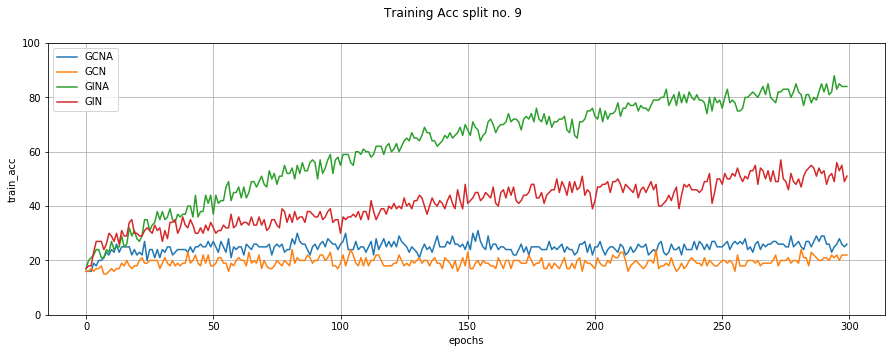

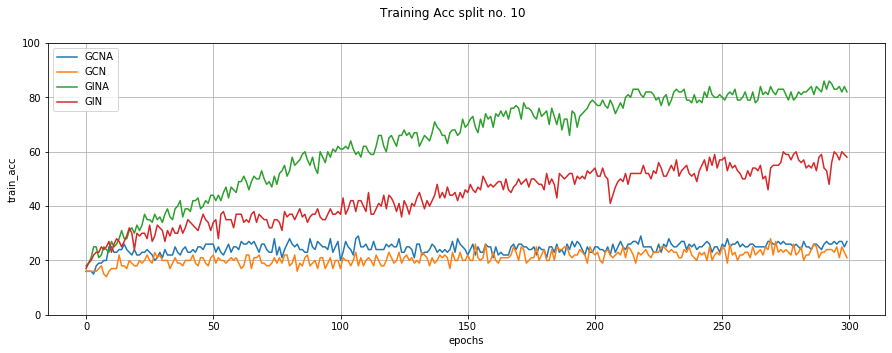

In [49]:
plot_training_acc(training_logs[1], 10)

### Third set of hyperparameters:

- learning rate = 0.001
- number of epochs = 300
- hidden layers' dimension = 64
- dropout rate = 0.1
- number of gnn layers (GIN) = 4
- number of mlp layers (GIN) = 2

| Model | Avg. Accuracy |std| Max Accuracy |
|:-----:|:-------------:|:--:|:------------:|
|  GCN  |     28.7%     |2.76|     35.0%    |
|  GCNA |     31.1%     |5.00|     38.0%    |
|  GIN  |     45.9%     |6.93|     53.0%    |
|  GINA |     60.8%     |5.45|     71.0%    |

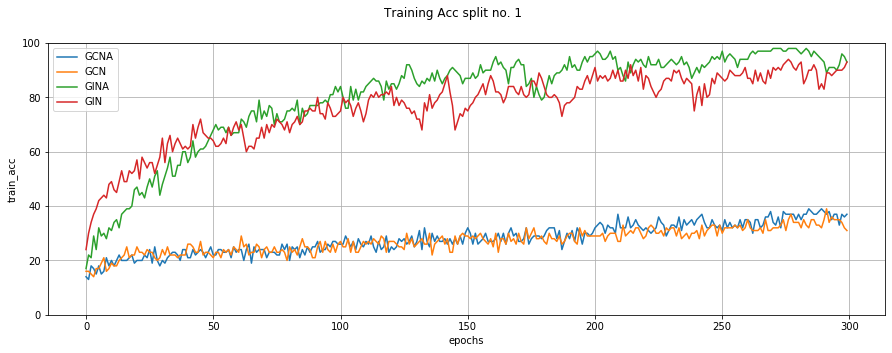

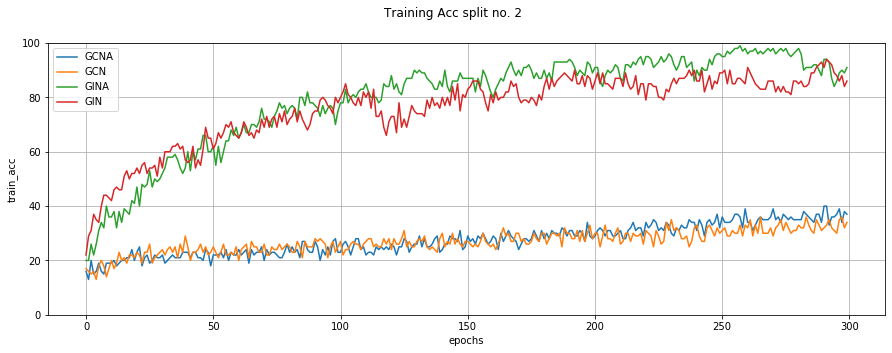

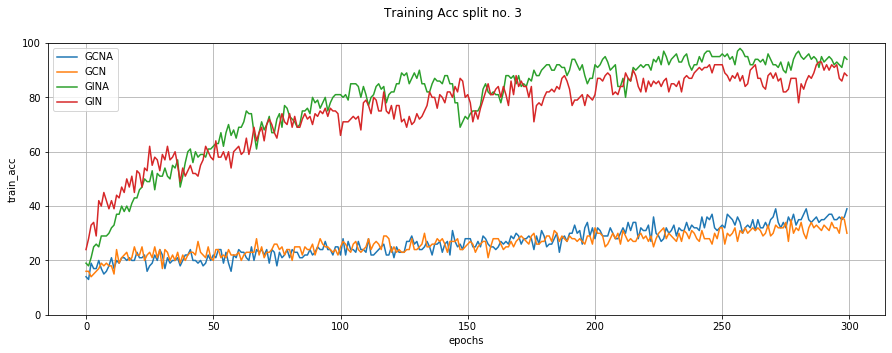

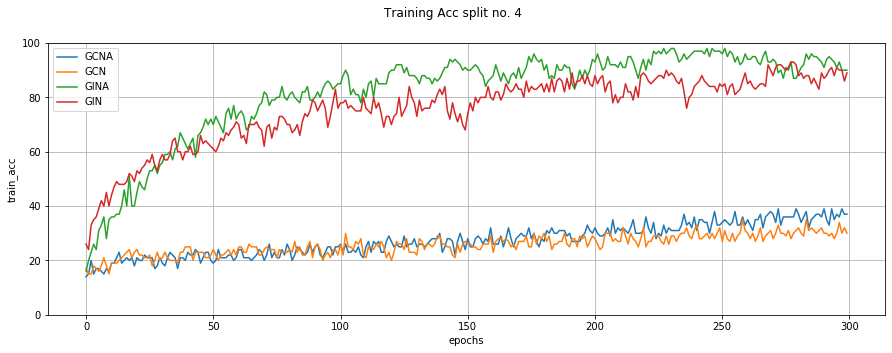

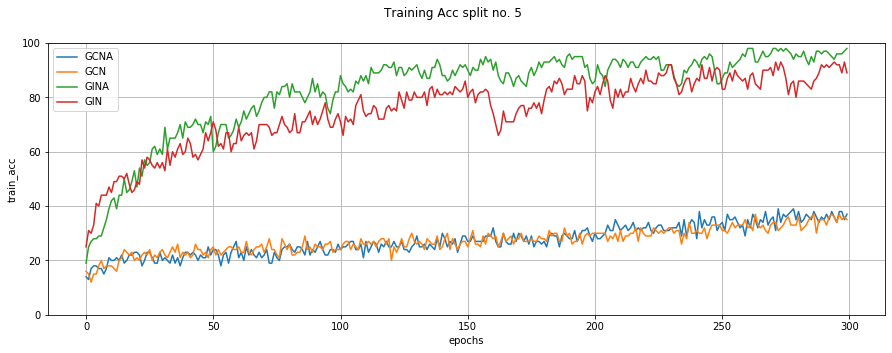

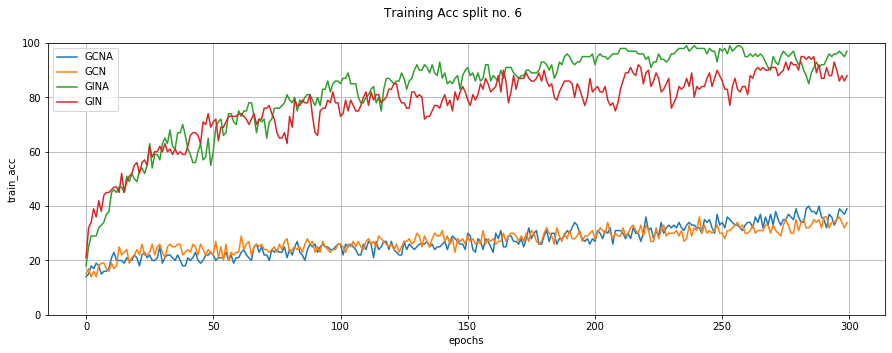

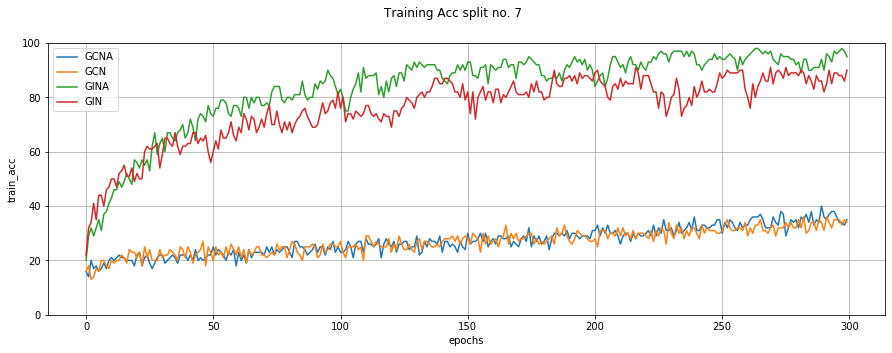

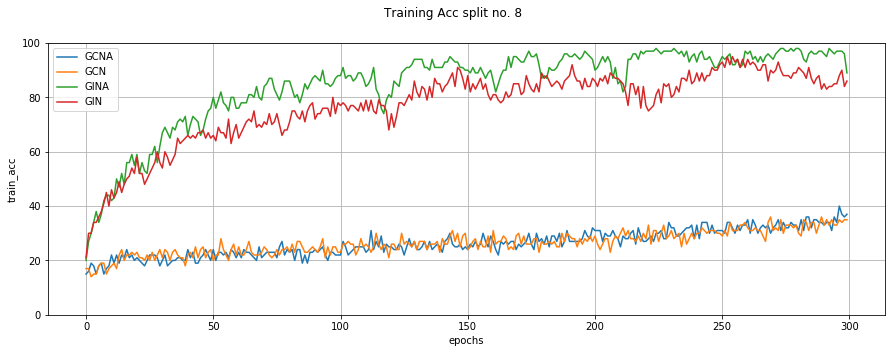

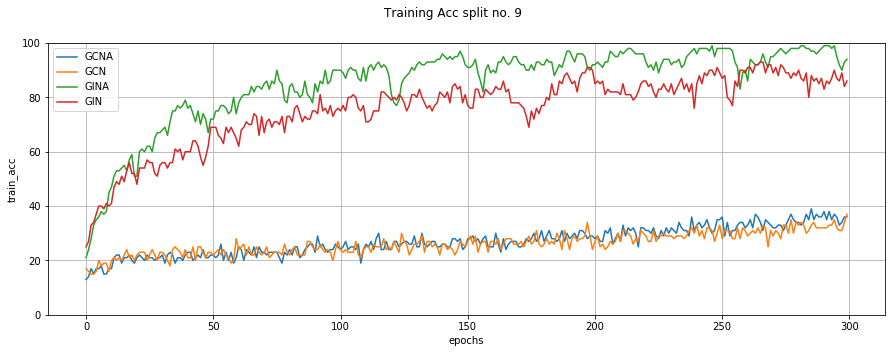

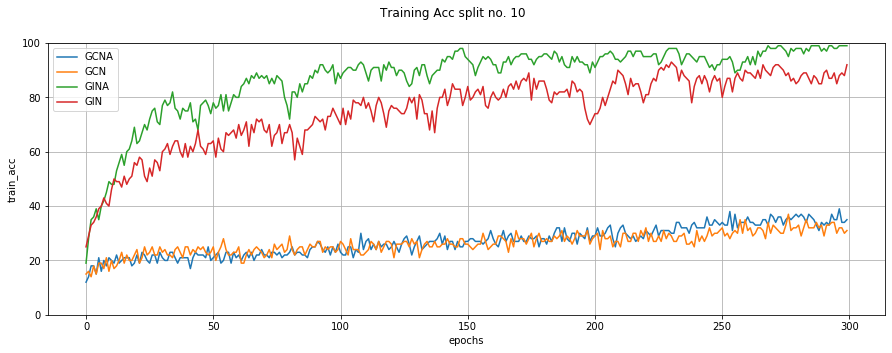

In [50]:
plot_training_acc(training_logs[2], 10)